In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-data-analyst-case-study-cyclist/202101-divvy-tripdata/202101-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202104-divvy-tripdata/202104-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202106-divvy-tripdata/202106-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202105-divvy-tripdata/202105-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202107-divvy-tripdata/202107-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202111-divvy-tripdata/202111-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202102-divvy-tripdata/202102-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202103-divvy-tripdata/202103-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202108-divvy-tripdata/202108-divvy-tripdata.csv
/kaggle/input/google-data-analyst-case-study-cyclist/202110-divvy-tripdata/202110-divvy-tri

# Introduction
### Welcome to the Cyclistic bike-share analysis case study! In this case study, you work for a fictional company, Cyclistic, along with some key team members. In order to answer the business questions, follow the steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act. Along the way, the Case Study Roadmap tables — including guiding questions and key tasks — will help you stay on the right path.
# Scenario
### You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# 1. Ask

## How do annual members and casual riders use Cyclistic bikes differently?

# 2. Prepare

#### Import all the spreadsheet data and combined them

In [2]:
import os

# Directory containing the CSV files
directory = '/kaggle/input/google-data-analyst-case-study-cyclist/'

# List of file names
file_names = [
    '202101-divvy-tripdata/202101-divvy-tripdata.csv',
    '202104-divvy-tripdata/202104-divvy-tripdata.csv',
    '202106-divvy-tripdata/202106-divvy-tripdata.csv',
    '202105-divvy-tripdata/202105-divvy-tripdata.csv',
    '202107-divvy-tripdata/202107-divvy-tripdata.csv',
    '202111-divvy-tripdata/202111-divvy-tripdata.csv',
    '202102-divvy-tripdata/202102-divvy-tripdata.csv',
    '202103-divvy-tripdata/202103-divvy-tripdata.csv',
    '202108-divvy-tripdata/202108-divvy-tripdata.csv',
    '202110-divvy-tripdata/202110-divvy-tripdata.csv',
    '202109-divvy-tripdata/202109-divvy-tripdata.csv',
    '202112-divvy-tripdata/202112-divvy-tripdata.csv'
]


# Initialize an empty list to store file paths
file_list = []

# Loop through all file names
for filename in file_names:
    file_path = os.path.join(directory, filename)  # Get the full path of the file
    file_list.append(file_path)  # Add the file path to the list

# Import CSV files
dfs = []
for file in file_list:
    df = pd.read_csv(file)
    dfs.append(df)

# Combine dataframes if needed
combined_df = pd.concat(dfs, ignore_index=True)

#### Look at the infromation and the columns of the data frame

In [3]:
# View basic information about the DataFrame
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB
None


In [4]:

# View the first few rows of the DataFrame
print(combined_df.head())

            ride_id  rideable_type           started_at             ended_at  \
0  E19E6F1B8D4C42ED  electric_bike  2021-01-23 16:14:19  2021-01-23 16:24:44   
1  DC88F20C2C55F27F  electric_bike  2021-01-27 18:43:08  2021-01-27 18:47:12   
2  EC45C94683FE3F27  electric_bike  2021-01-21 22:35:54  2021-01-21 22:37:14   
3  4FA453A75AE377DB  electric_bike  2021-01-07 13:31:13  2021-01-07 13:42:55   
4  BE5E8EB4E7263A0B  electric_bike  2021-01-23 02:24:02  2021-01-23 02:24:45   

           start_station_name start_station_id end_station_name  \
0  California Ave & Cortez St            17660              NaN   
1  California Ave & Cortez St            17660              NaN   
2  California Ave & Cortez St            17660              NaN   
3  California Ave & Cortez St            17660              NaN   
4  California Ave & Cortez St            17660              NaN   

  end_station_id  start_lat  start_lng  end_lat  end_lng member_casual  
0            NaN  41.900341 -87.696743    4

# 3. Process

#### Clean the data and create new columns 

In [5]:
# Check for null values in the DataFrame
null_values = combined_df.isnull().sum()

# Print the number of null values in each column
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64


#### Even there are null values in the data frame pandas do not detect them, it's possible that the missing values are not represented as NaN but rather as some other placeholder, such as empty strings or other non-null values. We can try a different approach to identify missing values. We can check for other common representations of missing values, such as empty strings or specific placeholders, and then count them accordingly.

In [6]:
# Count empty strings in each column
empty_string_count = (combined_df == '').sum()

# Print the count of empty strings in each column
print("Count of empty strings in each column:")
print(empty_string_count)

Count of empty strings in each column:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


#### There are no empty strings, so there can be anaother placeholder. We can replace those place holders using NaN

In [7]:
# Replace specific placeholders with NaN
combined_df.replace('NaN', pd.NA, inplace=True)

# Count NaN values in each column
nan_count = combined_df.isna().sum()

# Print the count of NaN values in each column
print("Count of NaN values in each column:")
print(nan_count)

Count of NaN values in each column:
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64


In [8]:
combined_df["end_station_id"]

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
               ...     
5595058             NaN
5595059    KA1503000043
5595060    TA1305000006
5595061             NaN
5595062    TA1305000006
Name: end_station_id, Length: 5595063, dtype: object

#### Above clearly shows there are 4588302 entries in the end station_id but in the data frame there are 5595062 entries so clearly there is missing values in the data frame. Lets just look at each file seperately without combining them

In [9]:
# List of file paths
file_paths = [
    "/kaggle/input/google-data-analyst-case-study-cyclist/202101-divvy-tripdata/202101-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202104-divvy-tripdata/202104-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202106-divvy-tripdata/202106-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202105-divvy-tripdata/202105-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202107-divvy-tripdata/202107-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202111-divvy-tripdata/202111-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202102-divvy-tripdata/202102-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202103-divvy-tripdata/202103-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202108-divvy-tripdata/202108-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202110-divvy-tripdata/202110-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202109-divvy-tripdata/202109-divvy-tripdata.csv",
    "/kaggle/input/google-data-analyst-case-study-cyclist/202112-divvy-tripdata/202112-divvy-tripdata.csv"
]

# List to store filtered DataFrames
filtered_dfs = []

# Loop through each file path
for file_path in file_paths:
    # Load CSV file
    df = pd.read_csv(file_path)
    
    # Count NaN values in each column
    nan_counts = df.isna().sum()
    
    # Display the count of NaN values for each file
    print("NaN counts for file:", file_path)
    print(nan_counts)
    print("\n")  # Add a new line for separation

NaN counts for file: /kaggle/input/google-data-analyst-case-study-cyclist/202101-divvy-tripdata/202101-divvy-tripdata.csv
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     8625
start_station_id       8625
end_station_name      10277
end_station_id        10277
start_lat                 0
start_lng                 0
end_lat                 103
end_lng                 103
member_casual             0
dtype: int64


NaN counts for file: /kaggle/input/google-data-analyst-case-study-cyclist/202104-divvy-tripdata/202104-divvy-tripdata.csv
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    26056
start_station_id      26056
end_station_name      28174
end_station_id        28174
start_lat                 0
start_lng                 0
end_lat                 267
end_lng                 267
member_casual             0
dtype: int64


#### Before combining them drop NaN from each csv file

In [10]:
# List to store filtered DataFrames
filtered_dfs = []


# Loop through each file path
for file_path in file_paths:
    # Load CSV file
    df = pd.read_csv(file_path)
    
    # Drop NaN rows
    df_filtered = df.dropna()
    
    # Append filtered DataFrame to the list
    filtered_dfs.append(df_filtered)

# Combine filtered DataFrames
combined_df = pd.concat(filtered_dfs, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

                  ride_id  rideable_type           started_at  \
0        B9F73448DFBE0D45   classic_bike  2021-01-24 19:15:38   
1        457C7F4B5D3DA135  electric_bike  2021-01-23 12:57:38   
2        57C750326F9FDABE  electric_bike  2021-01-09 15:28:04   
3        4D518C65E338D070  electric_bike  2021-01-09 15:28:57   
4        9D08A3AFF410474D   classic_bike  2021-01-24 15:56:59   
...                   ...            ...                  ...   
4588297  E06135F650553F21  electric_bike  2021-12-07 15:55:37   
4588298  8DF0DBB049906332  electric_bike  2021-12-01 16:50:52   
4588299  CF407BBC3B9FAD63  electric_bike  2021-12-06 19:37:50   
4588300  60BB69EBF5440E92  electric_bike  2021-12-02 08:57:04   
4588301  37AC57E34B2E7E97   classic_bike  2021-12-13 08:45:32   

                    ended_at           start_station_name start_station_id  \
0        2021-01-24 19:22:51   California Ave & Cortez St            17660   
1        2021-01-23 13:02:10   California Ave & Cortez St      

# 4. Analyze 

#### Calculate the total ride time and create a new ride_time column in minutes

In [11]:
# Convert 'started_at' and 'ended_at' columns to datetime
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'])

# Calculate time difference in minutes
combined_df['ride_time'] = (combined_df['ended_at'] - combined_df['started_at']).dt.total_seconds() / 60

# Display the modified DataFrame
print(combined_df.head())

            ride_id  rideable_type          started_at            ended_at  \
0  B9F73448DFBE0D45   classic_bike 2021-01-24 19:15:38 2021-01-24 19:22:51   
1  457C7F4B5D3DA135  electric_bike 2021-01-23 12:57:38 2021-01-23 13:02:10   
2  57C750326F9FDABE  electric_bike 2021-01-09 15:28:04 2021-01-09 15:37:51   
3  4D518C65E338D070  electric_bike 2021-01-09 15:28:57 2021-01-09 15:37:54   
4  9D08A3AFF410474D   classic_bike 2021-01-24 15:56:59 2021-01-24 16:07:08   

           start_station_name start_station_id            end_station_name  \
0  California Ave & Cortez St            17660      Wood St & Augusta Blvd   
1  California Ave & Cortez St            17660  California Ave & North Ave   
2  California Ave & Cortez St            17660      Wood St & Augusta Blvd   
3  California Ave & Cortez St            17660      Wood St & Augusta Blvd   
4  California Ave & Cortez St            17660      Wood St & Augusta Blvd   

  end_station_id  start_lat  start_lng    end_lat    end_lng m

#### The maximum, minimum and average ride time

In [12]:
# Get maximum value from time_difference_minutes column
max_time_difference = combined_df['ride_time'].max()

print("Maximum time difference in minutes:", max_time_difference)

# Get minimum value from time_difference_minutes column
min_time_difference = combined_df['ride_time'].min()

print("Minimum time difference in minutes:", min_time_difference)

# Get average value from time_difference_minutes column
ave_time_difference = combined_df['ride_time'].mean()

print("Maximum time difference in minutes:", ave_time_difference)


Maximum time difference in minutes: 55944.15
Minimum time difference in minutes: -55.9
Maximum time difference in minutes: 21.81062794035788


In [13]:
# Assuming 'column_name' is the column you want to analyze
Q1 = combined_df['ride_time'].quantile(0.25)
Q3 = combined_df['ride_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_df[(combined_df['ride_time'] < lower_bound) | (combined_df['ride_time'] > upper_bound)]

print("Outliers:", outliers)

Outliers:                   ride_id  rideable_type          started_at  \
123      0EDD906628861314   classic_bike 2021-01-22 20:54:49   
140      33A754F67BD337A7   classic_bike 2021-01-13 14:29:33   
166      2CE7583737A818C4   classic_bike 2021-01-04 14:03:49   
333      795E03AF09CE93F8   classic_bike 2021-01-21 11:13:36   
334      E9B4DB03F6F7226C  electric_bike 2021-01-20 11:29:49   
...                   ...            ...                 ...   
4588203  A5CC5626F489E435  electric_bike 2021-12-19 15:13:52   
4588247  16D502978941DBE8   classic_bike 2021-12-31 09:12:14   
4588250  6023529519AB5300   classic_bike 2021-12-09 17:27:37   
4588271  A46E250C7B3A426E   classic_bike 2021-12-12 13:00:29   
4588277  1D17355FC340FB36   classic_bike 2021-12-12 11:54:58   

                   ended_at           start_station_name start_station_id  \
123     2021-01-22 21:41:26   Indiana Ave & Roosevelt Rd           SL-005   
140     2021-01-13 15:17:50   Kedzie Ave & Milwaukee Ave           

#### Drop outliers form the data frame

In [14]:
# 'outliers' is the DataFrame containing the outliers
outlier_indices = outliers.index

# Drop outliers from the original DataFrame
combined_df = combined_df.drop(outlier_indices)

#### Find started week and ended week columns and drop started_at and ended_at column

In [15]:
# Function to calculate week of the month
def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return (adjusted_dom - 1) // 7 + 1

# Convert 'started_at' and 'ended_at' columns to datetime
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'])

# Calculate week of the month
combined_df['started_week_of_month'] = combined_df['started_at'].apply(week_of_month)
combined_df['ended_week_of_month'] = combined_df['ended_at'].apply(week_of_month)


# Display the modified DataFrame
print(combined_df)

                  ride_id  rideable_type          started_at  \
0        B9F73448DFBE0D45   classic_bike 2021-01-24 19:15:38   
1        457C7F4B5D3DA135  electric_bike 2021-01-23 12:57:38   
2        57C750326F9FDABE  electric_bike 2021-01-09 15:28:04   
3        4D518C65E338D070  electric_bike 2021-01-09 15:28:57   
4        9D08A3AFF410474D   classic_bike 2021-01-24 15:56:59   
...                   ...            ...                 ...   
4588297  E06135F650553F21  electric_bike 2021-12-07 15:55:37   
4588298  8DF0DBB049906332  electric_bike 2021-12-01 16:50:52   
4588299  CF407BBC3B9FAD63  electric_bike 2021-12-06 19:37:50   
4588300  60BB69EBF5440E92  electric_bike 2021-12-02 08:57:04   
4588301  37AC57E34B2E7E97   classic_bike 2021-12-13 08:45:32   

                   ended_at           start_station_name start_station_id  \
0       2021-01-24 19:22:51   California Ave & Cortez St            17660   
1       2021-01-23 13:02:10   California Ave & Cortez St            17660   


#### Only select columns ride_id,rideable_type, start_station_id, member_casual, ride_time and started_week_of_month

In [16]:
df=combined_df[['ride_id', 'rideable_type', 'start_station_id', 'member_casual', 'ride_time', 'started_week_of_month','started_at']]
print(df.head(5))

            ride_id  rideable_type start_station_id member_casual  ride_time  \
0  B9F73448DFBE0D45   classic_bike            17660        member   7.216667   
1  457C7F4B5D3DA135  electric_bike            17660        member   4.533333   
2  57C750326F9FDABE  electric_bike            17660        casual   9.783333   
3  4D518C65E338D070  electric_bike            17660        casual   8.950000   
4  9D08A3AFF410474D   classic_bike            17660        casual  10.150000   

   started_week_of_month          started_at  
0                      4 2021-01-24 19:15:38  
1                      4 2021-01-23 12:57:38  
2                      2 2021-01-09 15:28:04  
3                      2 2021-01-09 15:28:57  
4                      4 2021-01-24 15:56:59  


# 5. Share


### Rideable Type Distribution: 

#### Visualize the distribution of different rideable types (classic bike, electric bike, etc.) used by members and casual riders. This can help understand the popularity of each type among different user groups.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

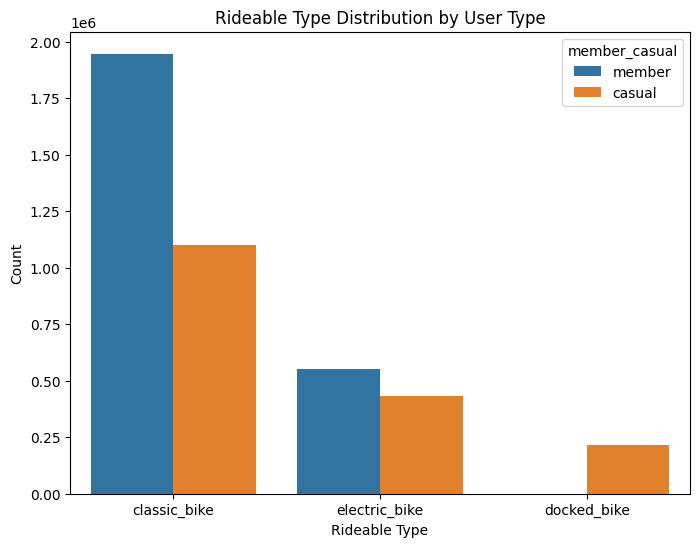

In [18]:
# Rideable Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rideable_type', hue='member_casual', data=df)
plt.title('Rideable Type Distribution by User Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.show()

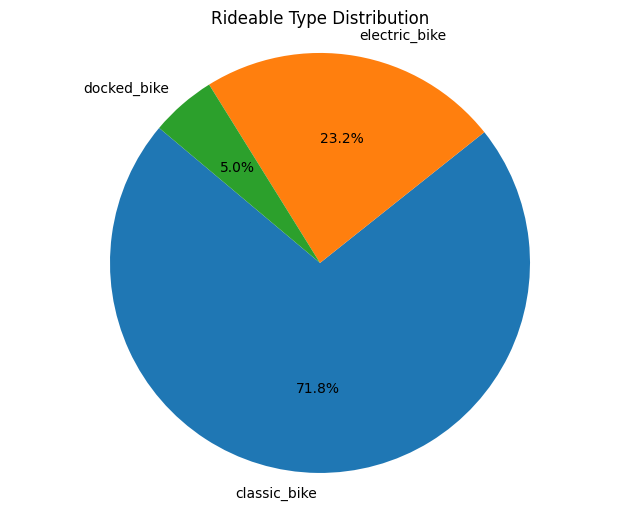

In [19]:
# Pie Charts
# Rideable Type Distribution
rideable_type_counts = df['rideable_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rideable_type_counts, labels=rideable_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rideable Type Distribution')
plt.axis('equal')
plt.show()

### Ride Duration Distribution: 

#### Plot histograms or boxplots to show the distribution of ride durations for both member and casual riders. This can reveal insights into the typical ride lengths for each user group.

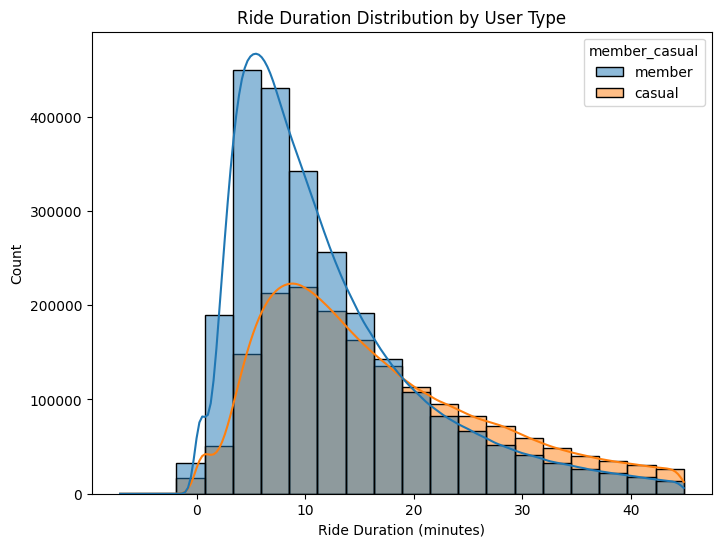

In [20]:
# Ride Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(x='ride_time', hue='member_casual', data=df, bins=20, kde=True)
plt.title('Ride Duration Distribution by User Type')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Count')
plt.show()

### User Type Distribution: 
#### Create a pie chart to show the distribution of user types 

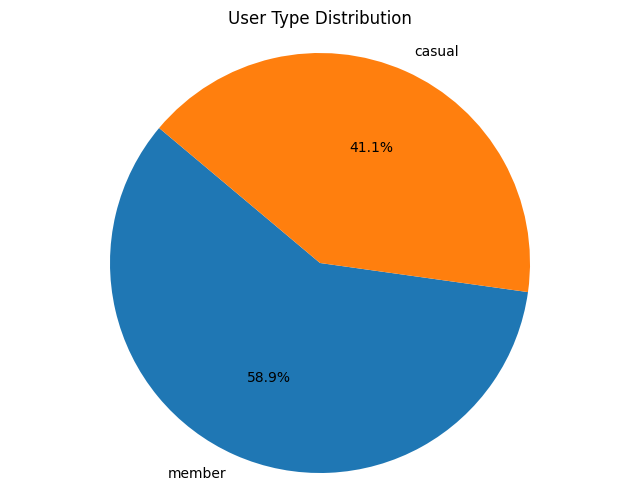

In [21]:
# User Type Distribution
user_type_counts = df['member_casual'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('User Type Distribution')
plt.axis('equal')
plt.show()

### Membership vs. Casual Usage Patterns: 
#### Compare the usage patterns (ride frequency, ride duration, etc.) between members and casual riders. You can use line charts or stacked bar charts to visualize these differences over time.

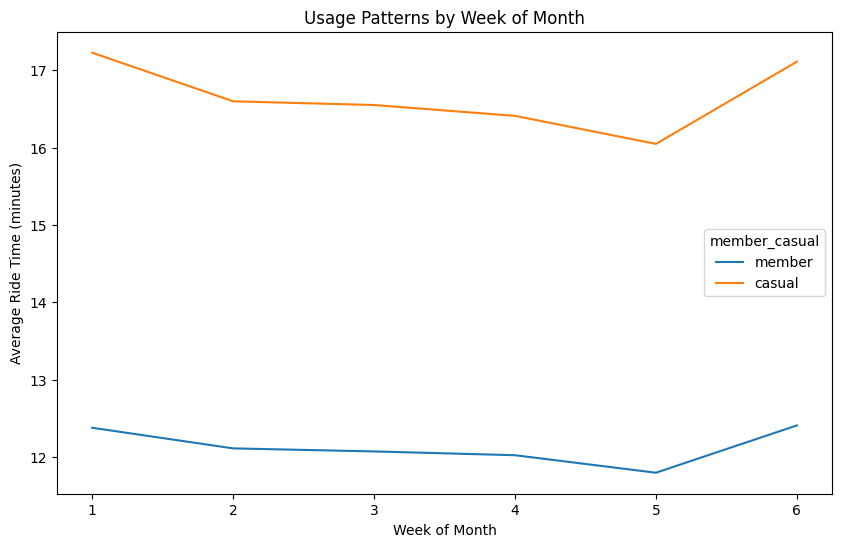

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='started_week_of_month', y='ride_time', hue='member_casual', data=df, err_style=None)
plt.title('Usage Patterns by Week of Month')
plt.xlabel('Week of Month')
plt.ylabel('Average Ride Time (minutes)')
plt.show()

### Average Ride Time by Rideable Type: 
#### Plot a line graph to show the average ride time for each rideable type.

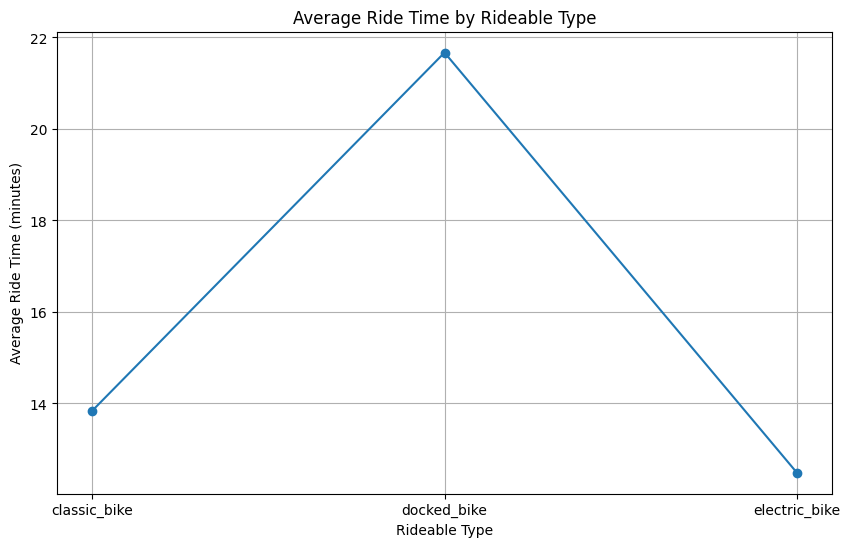

In [23]:
# Average Ride Time by Rideable Type
plt.figure(figsize=(10, 6))
average_ride_time_by_type = df.groupby('rideable_type')['ride_time'].mean()
plt.plot(average_ride_time_by_type.index, average_ride_time_by_type.values, marker='o', linestyle='-')
plt.title('Average Ride Time by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Average Ride Time (minutes)')
plt.grid(True)
plt.show()

### Trend Analysis by Week of Month: 
#### Investigate how ride volumes vary throughout the month by analyzing trends based on the week of the month. This could involve creating line charts showing ride counts or durations over different weeks.

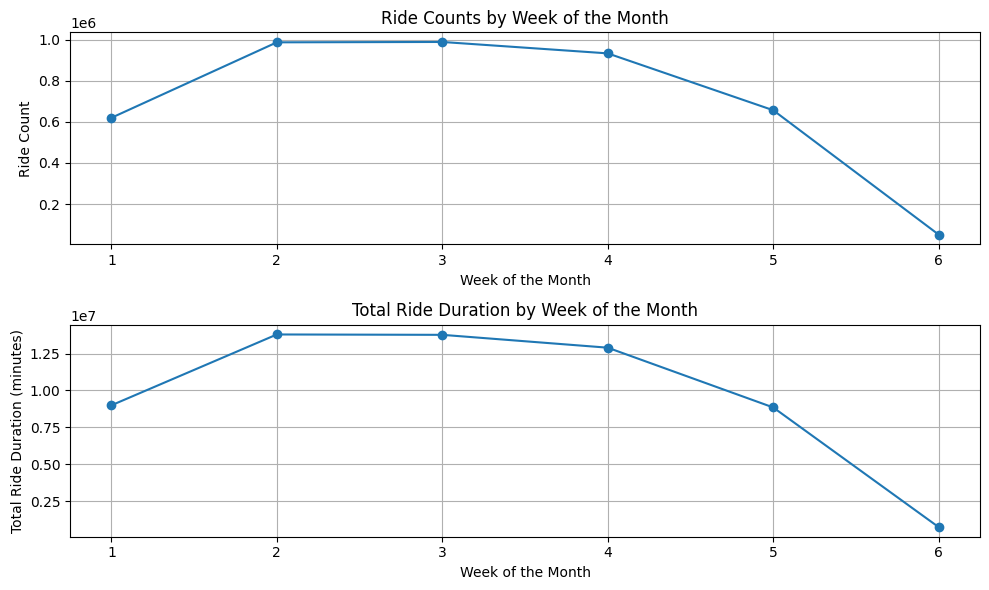

In [24]:

# Group the data by week of the month and calculate ride counts and total ride duration
weekly_stats = df.groupby('started_week_of_month').agg({'ride_id': 'count', 'ride_time': 'sum'})

# Plot the trend analysis using line charts
plt.figure(figsize=(10, 6))

# Plot ride counts over different weeks
plt.subplot(2, 1, 1)  # Subplot for ride counts
plt.plot(weekly_stats.index, weekly_stats['ride_id'], marker='o', linestyle='-')
plt.title('Ride Counts by Week of the Month')
plt.xlabel('Week of the Month')
plt.ylabel('Ride Count')
plt.grid(True)

# Plot total ride duration over different weeks
plt.subplot(2, 1, 2)  # Subplot for total ride duration
plt.plot(weekly_stats.index, weekly_stats['ride_time'], marker='o', linestyle='-')
plt.title('Total Ride Duration by Week of the Month')
plt.xlabel('Week of the Month')
plt.ylabel('Total Ride Duration (minutes)')
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

### Most used Station:
#### Use map to find the most used station depending on the frequncy of the station

In [25]:
import folium

# Define the sampling ratio (e.g., 0.1 for 10% of the data)
sampling_ratio = 0.6

# Downsample the DataFrame
downsampled_df = combined_df.sample(frac=sampling_ratio, random_state=42)

# Create a map centered at the mean latitude and longitude of the downsampled data
center_lat = downsampled_df['start_lat'].mean()
center_lon = downsampled_df['start_lng'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add a tile layer from a tileset (OpenStreetMap)
folium.TileLayer('openstreetmap').add_to(m)

# Save or display the map
m

# 6. Act

## This case study reveles following important details;


#### Most used bikes are classical bikes, Members use most of the bikes, Docked bikes are used by casual users
#### Average ride time of the casual users are always higher than the members
#### The average ride time in week 5 of every month is less for both casual and members
#### The average ride time of Docked bikes are higher than the other two